In [1]:
import pylab
import nest
import numpy

In [2]:
edict = {"I_e": 200.0, "tau_m": 20.0}
nest.CopyModel("iaf_psc_alpha", "exc_iaf_psc_alpha")
nest.SetDefaults("exc_iaf_psc_alpha", edict)

In [3]:
idict = {"I_e": 300.0}
nest.CopyModel("iaf_psc_alpha", "inh_iaf_psc_alpha", params=idict)

In [4]:
epop1 = nest.Create("exc_iaf_psc_alpha", 100)
epop2 = nest.Create("exc_iaf_psc_alpha", 100)
ipop1 = nest.Create("inh_iaf_psc_alpha", 30)
ipop2 = nest.Create("inh_iaf_psc_alpha", 30)

In [5]:
Vth=-55.
Vrest=-70.
for neuron in epop1:
    nest.SetStatus([neuron], {"V_m": Vrest+(Vth-Vrest)*numpy.random.rand()})

In [6]:
d = 1.0
Je = 2.0
Ke = 20
Ji = -4.0
Ki = 12
conn_dict_ex = {"rule": "fixed_indegree", "indegree": Ke}
conn_dict_in = {"rule": "fixed_indegree", "indegree": Ki}
syn_dict_ex = {"delay": d, "weight": Je}
syn_dict_in = {"delay": d, "weight": Ji}
nest.Connect(epop1, ipop1, conn_dict_ex, syn_dict_ex)
nest.Connect(ipop1, epop1, conn_dict_in, syn_dict_in)

In [7]:
pg2 = nest.Create("poisson_generator")
nest.SetStatus(pg2, {"start": 50.0, "stop": 150.0})

In [8]:
nest.SetStatus(pg2, {"rate": 80000.0})
syn_dict_ex = {"weight": 1.2}
nest.Connect(pg2,epop1, syn_spec=syn_dict_ex)

In [9]:
pg3 = nest.Create("poisson_generator")
nest.SetStatus(pg2, {"rate":15000.0, "start": 50.0, "stop": 150.0})

In [10]:
syn_dict_ex2 = {"weight": 2.0}
nest.Connect(pg3,epop1, syn_spec=syn_dict_ex2)

In [11]:
mm3 = nest.Create("multimeter", 100)
nest.SetStatus(mm3, {"withtime":True, "record_from":["V_m"]})

In [12]:
nest.Connect(mm3, epop1, conn_spec="one_to_one")

In [13]:
nest.Simulate(500.0)

In [14]:
dmm = nest.GetStatus(mm3)
Vms = [x["events"]["V_m"] for x in dmm]
ts = [x["events"]["times"] for x in dmm]

(-23.900000000000002, 300)

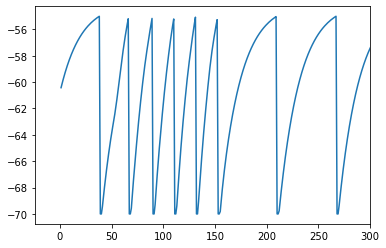

In [15]:
pylab.figure(1)
pylab.plot(ts[0], Vms[0])
pylab.xlim(right=300)

In [16]:
len(Vms)

100